# Linear Algebra Python으로 직관력 기르기! - 기본편

In [1]:
# 기본 라이브러리들 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# Notebook에 출력되는 그림 화질 설정 (높을수록 좋아짐)
mpl.rcParams['figure.dpi']= 100

# Step 1: 데이터 가져오기
* 이번 강의에서는 저번에 Linear Regression에서 썼던 데이터를 다시 쓰려고 합니다.
* 데이터 내용은 사람의 몸무게 관련 데이터입니다.
* 데이터 출처: https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

In [3]:
# pandas라이브러리를 이용해서 읽습니다. 
# 해당 파일이 노트북과 같은 폴더 위치에 있어야합니다.
# 아니라면 C:\로 시작하는 디렉토리를 입력하세요.
df = pd.read_csv('500_weight_height.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


# Step 2: 필요한 데이터만 추출하기
* 모델 피팅(회귀)를 쉽게 하기 위해서 특정 조건을 가진 열(row)들만 추출합니다.
* 남자의 몸무게와 키 중에서 BMI가 정상인 축에 속하는 사람만을 추출합니다.

In [21]:
# df.Index 행에서 2는 정상적 BMI를 마킹한 것입니다.
df_temp = df[(df.Gender=='Male')&(df.Index==2)]
# temp는 temporary(일시적인)의 약자로 썼습니다.
# df는 dataframe의 약자입니다. Dataframe은 파이썬의
# Pandas 라이브러리에서 표(테이블)을 뜻합니다.

# Step 3: 한 줄로 선형 회귀 완성

In [6]:
# Scikit-Learn(싸이킷-런)에서 선형 회귀 함수 호출
from sklearn.linear_model import LinearRegression
# 그냥 fit()한번이면 바로 끝납니다! fit을 사용하게 되면 회귀를 위한
# 기울기와 y절편이 reg에 오브젝트 형식으로 저장되는 것입니다.
# 문법은 fit(x,y)입니다. 그리고 x는 2차원 행렬이어야해서,
# 1차원 행렬인 df_temp.Height에 .value.reshape(-1,1)을 해주어야합니다.
reg = LinearRegression().fit(df_temp.Height.values.reshape(-1,1), df_temp.Weight)

# Step 4: 한 줄로 회귀선 불러오기

In [8]:
# 회귀 선을 그래프에 표현하려면 우리가 만든 회귀 오브젝트로 수백 수천개의 
# 점들을 촘촘하게 예측하게 해야합니다.
# 생성된 x들이라는 의미의 x_generated에 150, 150.1, 150.2, ..., 200에
# 해당하는 숫자들을 생성해서 저장시킵니다.
# 그 후에 .reshape(-1,1)로 2차원 배열로 만드는 동시에
# 모든 값들을 예측하도록 합니다.
# 쉽게 생각하면 reg라는 변수에는 현재 회귀선의 기울기와 y절편이 이미
# 저장된 상태이고 reg.predict()를 호출하면 그 기울기와 y절편으로 y값을
# 예측하는 것입니다.
x_generated = np.array(list(range(1500,2000)))/10
pred_line = reg.predict(x_generated.reshape(-1,1))

Text(0, 0.5, 'Weight')

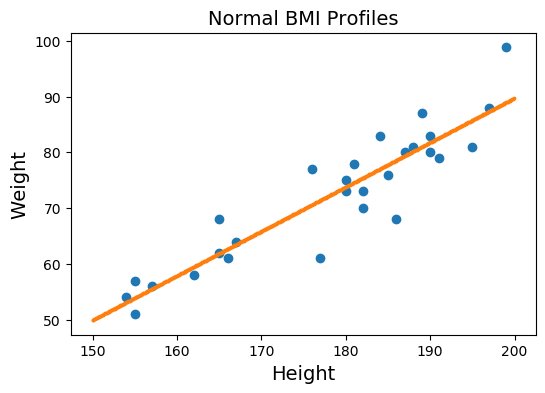

In [10]:
# 원래의 데이터들을 찍어봅니다. 파란색점으로 표시됩니다.
plt.scatter(df_temp.Height, df_temp.Weight)
# 방금 reg.predict로 만든 수백개의 주황색 점을 찍어서 마치 선인 것처럼 보이게 했습니다.
plt.scatter((np.array(list(range(1500,2000)))/10),pred_line,s=3) 
# X축과 Y축 그리고 제목을 답니다.
plt.title('Normal BMI Profiles',fontsize=14)
plt.xlabel('Height',fontsize=14)
plt.ylabel('Weight',fontsize=14)

# Step 4(부록): 그래프 표현 두 번째 방식

Text(0, 0.5, 'Weight')

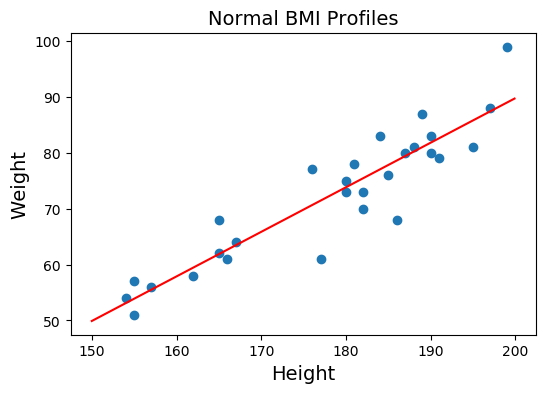

In [15]:
# 원래의 데이터들을 찍어봅니다. 파란색점으로 표시됩니다.
plt.scatter(df_temp.Height, df_temp.Weight)
# plt.plot은 수백개의 점을 찍지 않고 그냥 선으로 긋는 방식입니다.
# 대신 점의 사이즈는 s말고 markersize로 바꾸어야합니다.
plt.plot((np.array(list(range(1500,2000)))/10),pred_line,markersize=5,c='red') 
# X축과 Y축 그리고 제목을 답니다.
plt.title('Normal BMI Profiles',fontsize=14)
plt.xlabel('Height',fontsize=14)
plt.ylabel('Weight',fontsize=14)

# Step 5: 스코어로 우리의 모델 채점해보기

Scikit-Learn(싸이킷-런)에서 .score(x,y)라는 함수가 있습니다. 이 함수로 R-squared 지표를
빠르게 뽑아볼 수 있습니다. 아래 R-squared 공식을 살펴보면 분모에는 평균값과 y값들의 차이, 그리고
분자에는 예측값과 y값들의 차이가 나옵니다. 그 두 차이 간의 비율을 비교하는 것이 R-squared 지표입니다.
직관적으로 생각해보세요. 우리는 보통 무언가 대충 어림잡아 예측할 때 평균값을 사용합니다. 그 평균값으로
예측하는 것과 우리가 사용하는 모델이 예측하는 것을 비교하는 것이 R-squared입니다!!! R-squared가 양수이면
그만큼 우리의 모델이 낫다는 뜻이고 R-squared가 음수이면 그만큼 우리의 모델이 평균값보다 덜 좋다는 뜻입니다.
R-squared가 음수인 모델들은 그렇게 흔하지는 않습니다. 더욱 와닿게 설명하기 위해 아래에 그래프를 그려드리겠습니다.
* $$R^2 = 1-\frac{\sum_{i=1}^n(\hat{y}_i-y_i)^2}{\sum_{i=1}^n(\bar{y}_i-y_i)^2}$$

Text(0, 0.5, 'Weight')

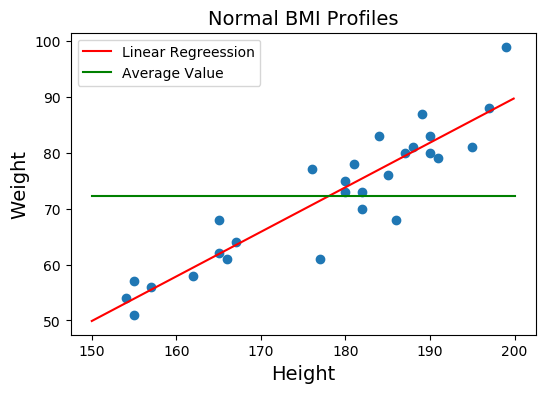

In [19]:
# R-squared 직관적으로 이해하기!!!

# 원래의 y_i 데이터 점으로 찍기
plt.scatter(df_temp.Height, df_temp.Weight)
# 회귀선 그리기 (빨간색)
plt.plot((np.array(list(range(1500,2000)))/10),pred_line,markersize=5,c='red',label=1) 
# 평균값 선 그리기 (초록색)
y_avg = np.mean(df_temp.Weight)
plt.plot([150,200],[y_avg,y_avg],markersize=5,c='green',label=2)
# Legend 표기
plt.legend(['Linear Regreession', 'Average Value'])
# X축과 Y축 그리고 제목을 답니다.
plt.title('Normal BMI Profiles',fontsize=14)
plt.xlabel('Height',fontsize=14)
plt.ylabel('Weight',fontsize=14)

# 우리가 예측했던 것 처럼 회귀 선인 빨간색선이 초록색 평균값 선보다 훨씬 좋아보입니다.

In [17]:
# R-squared 값은 -1~1만 존재합니다. 우리의 모델인 빨간선이 더 잘하고 있기 때문에 R-squared 값은
# 양수인 것을 이미 예상하고 있었습니다. 실제 R-squared 값을 호출해보니, 양수인 것을 넘어,
# 꽤 높은 R-squared 값을 기록하고 있습니다. 0.84면 1에 꽤나 가까운 값이네요.
# 1은 완벽한 fit을 말하지만, 1이 나온다는 것은 모델이 쓰레기라는 뜻일 가능성이 높습니다.
# 왜냐하면, 실생활에서 통계학자들은 랜덤한 변수들이 주는 오차들 때문에 R-squared가
# 1이 되는 것은 말이 되지 않는다고 생각하기 때문입니다. 모델이 과하게 좋은 지표를
# 내놓을 경우에는, overfit을 의심해야합니다. Overfit이란 모델이 현재 데이터에 과도하게
# 적응하여서, 새로운 데이터 값이 왔을 때에는 오히려 더 안좋은 결과값을 내놓을 수 있다는
# 현상을 가리키는 말입니다. 
reg.score(df_temp.Height.values.reshape(-1,1), df_temp.Weight)

0.8431175329717986